Importing Libraries

In [1]:
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models, callbacks
import seaborn as sn


Creating Deep Neural Network and evaluating accuracy on Testing Dataset

In [2]:

labels = {'left': 0, 'right': 1, 'forward': 2, 'flip': 3, 'stop':4,'backward': 5, 'up': 6, 'down':7}
np.random.seed(42)

df = pd.read_csv('my_data.csv',index_col=0)
X = df.drop("label", axis=1)
y = df["label"].map(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

model = models.Sequential([
    layers.Dense(64, activation='relu' , input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',    
    patience=10,          
    verbose=1             
)

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping],shuffle=True)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.3203 - loss: 10.8825 - val_accuracy: 0.7420 - val_loss: 0.7778
Epoch 2/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7721 - loss: 0.6256 - val_accuracy: 0.7778 - val_loss: 0.4808
Epoch 3/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8725 - loss: 0.3485 - val_accuracy: 0.9096 - val_loss: 0.2557
Epoch 4/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9485 - loss: 0.1734 - val_accuracy: 0.9454 - val_loss: 0.1838
Epoch 5/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9235 - loss: 0.2527 - val_accuracy: 0.9661 - val_loss: 0.1041
Epoch 6/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9665 - loss: 0.1039 - val_accuracy: 0.9755 - val_loss: 0.0940
Epoch 7/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9755 - loss: 0.0872 - val_accuracy: 0.9529 - val_loss: 0.1274
Epoch 8/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9684 - loss: 0.0926 - val_accuracy: 0.984

Plotting Training and Validation Loss vs Number of Epochs

Epoch 1/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9842 - loss: 0.0539 - val_accuracy: 0.9765 - val_loss: 0.0606
Epoch 2/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9906 - loss: 0.0325 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 3/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9938 - loss: 0.0277 - val_accuracy: 0.9976 - val_loss: 0.0080
Epoch 4/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9983 - loss: 0.0084 - val_accuracy: 0.9224 - val_loss: 0.2740
Epoch 5/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9839 - loss: 0.0851 - val_accuracy: 0.9765 - val_loss: 0.0619
Epoch 6/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9811 - loss: 0.0663 - val_accuracy: 0.9459 - val_loss: 0.1644
Epoch 7/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9740 - loss: 0.0825 - val_accuracy: 0.9882 - val_loss: 0.0577
Epoch 8/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9651 - loss: 0.0760 - val_accuracy: 0.9

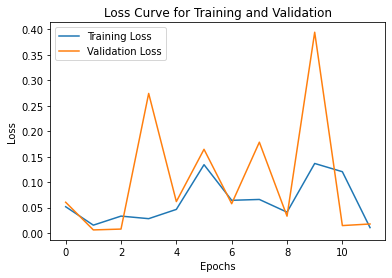

In [3]:
import matplotlib.pyplot as plt
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Scatter Plot of Dataset

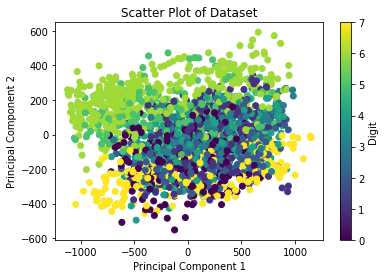

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(X_train)

plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Dataset')
plt.colorbar(label='Digit')
plt.show()


Confusion Matrix

17/17 [==============================] - 0s 4ms/step


Text(114.0, 0.5, 'actual')

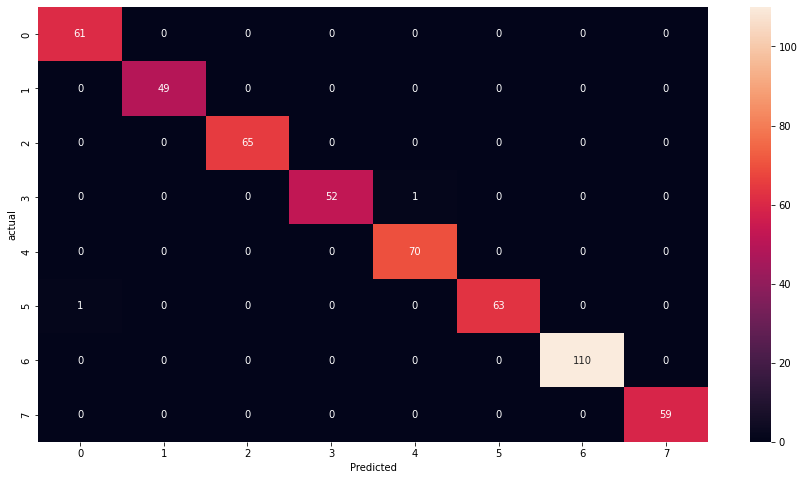

In [6]:
y_pred = model.predict(X_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

plt.figure(figsize=(15,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('actual')

Real Time Hand Gesture Recognition 

In [5]:
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np 

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
cap = cv2.VideoCapture(0)

with mp_hands.Hands(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:

    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            continue

        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = hands.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                arr = []
                for index, val in enumerate(hand_landmarks.landmark):
                    arr.append(640*val.x)
                    arr.append(480*val.y)
                    
                prediction = np.argmax(model.predict(np.expand_dims(arr,axis=0)))
                predictions = np.array((model.predict(np.expand_dims(arr,axis=0))).flatten())
                if max(predictions)>0.98:
                    predicted_label = list(labels.keys())[list(labels.values()).index(prediction)]
                    cv2.putText(image,predicted_label,  (50, 50),  cv2.FONT_HERSHEY_SIMPLEX, 1,  (0, 255, 255),  2,  cv2.LINE_4)

                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        cv2.imshow('MediaPipe Hands', image)
        if cv2.waitKey(1) == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━